## Goal of the Project

Build, train, test and deploy an Artificial Intelligence model to predict sentiment from real Amazon Echo customer reviews.

## Tools Used

Anaconda, Python, Scikit-Learn, Matplotlib, Numpy, Seaborn, Jupyter

## Practical/Real World application

- AI/ML based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not. The process could be done automatically without having humans manually review thousands of customer reviews.

We start by importing the necessary libraries for performing the tasks ahead.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
#Loading the data
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [3]:
#View the dataset
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
#View the dataset information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
#View the dataset statistical summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


#### Plotting a bar chart of the ratings given

<AxesSubplot:xlabel='rating', ylabel='count'>

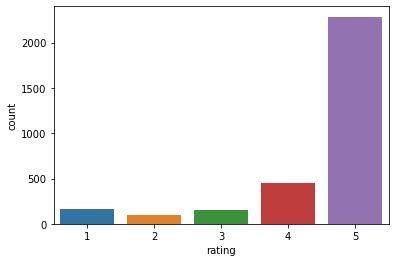

In [6]:
sns.countplot(x = reviews_df['rating'])

In [7]:
#Getting the length of the verified reviews column and updating the dataframe
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot:ylabel='Frequency'>

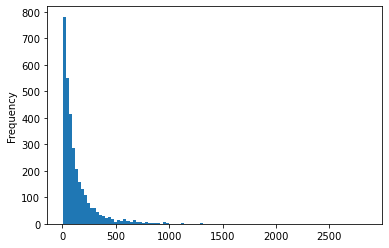

In [8]:
#Plotting the histogram for the lentgh values
reviews_df['length'].plot(kind='hist',bins=100)

The above histogram reveals that most customers left very short reviews while only a few customers gave reviews of large length.

<AxesSubplot:xlabel='feedback', ylabel='count'>

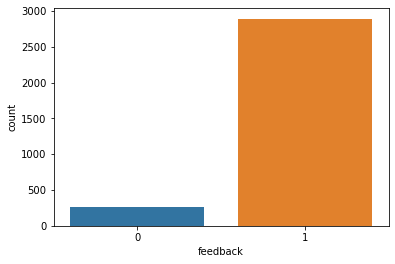

In [9]:
#Plotting the countplot for the feedback column
sns.countplot(x = reviews_df['feedback'])

## Plotting the WordCloud

In [10]:
#Obtaining only the positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]
positive.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [11]:
#Obtaining only the negative reviews
negative = reviews_df[reviews_df['feedback'] == 0]
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [12]:
#Converting to list format
pos_sentences = positive['verified_reviews'].tolist()
len(pos_sentences)

2893

In [13]:
#Same thing for the negative reviews
neg_sentences = negative['verified_reviews'].tolist()
len(neg_sentences)

257

In [14]:
#Join all reviews into one large string, for the positive sentences as well as negative sentences
pos_sentences_as_one_string = ' '.join(pos_sentences)
neg_sentences_as_one_string = ' '.join(neg_sentences)

In [20]:
# pos_sentences_as_one_string

In [19]:
# neg_sentences_as_one_string

In [17]:
pip install wordcloud

##### For the positive reviews

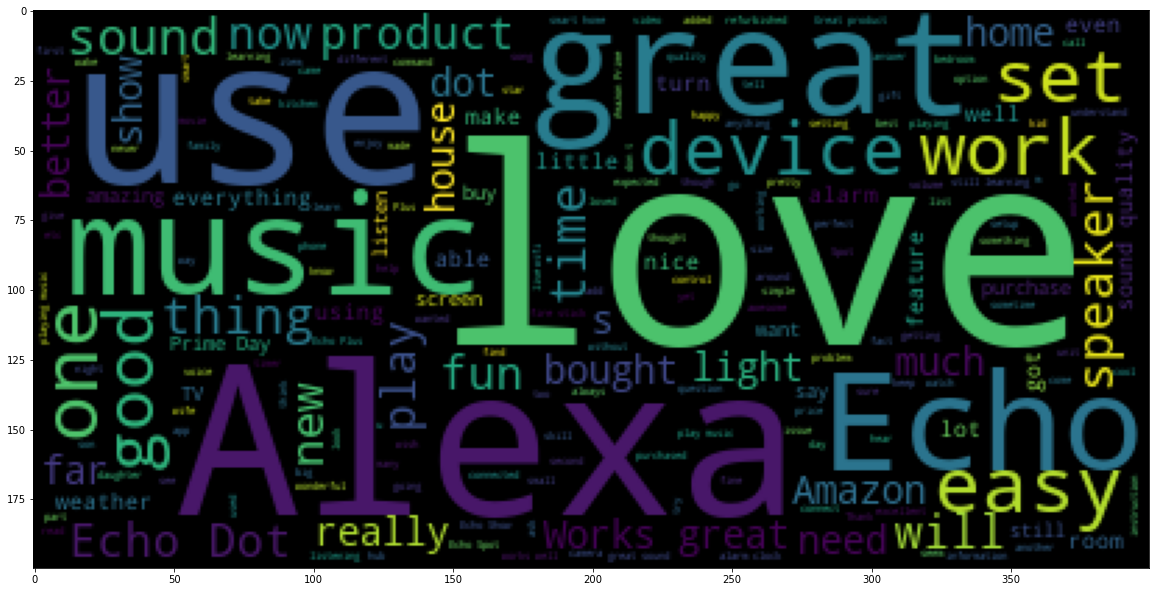

In [18]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate((pos_sentences_as_one_string)))

##### For the negative reviews

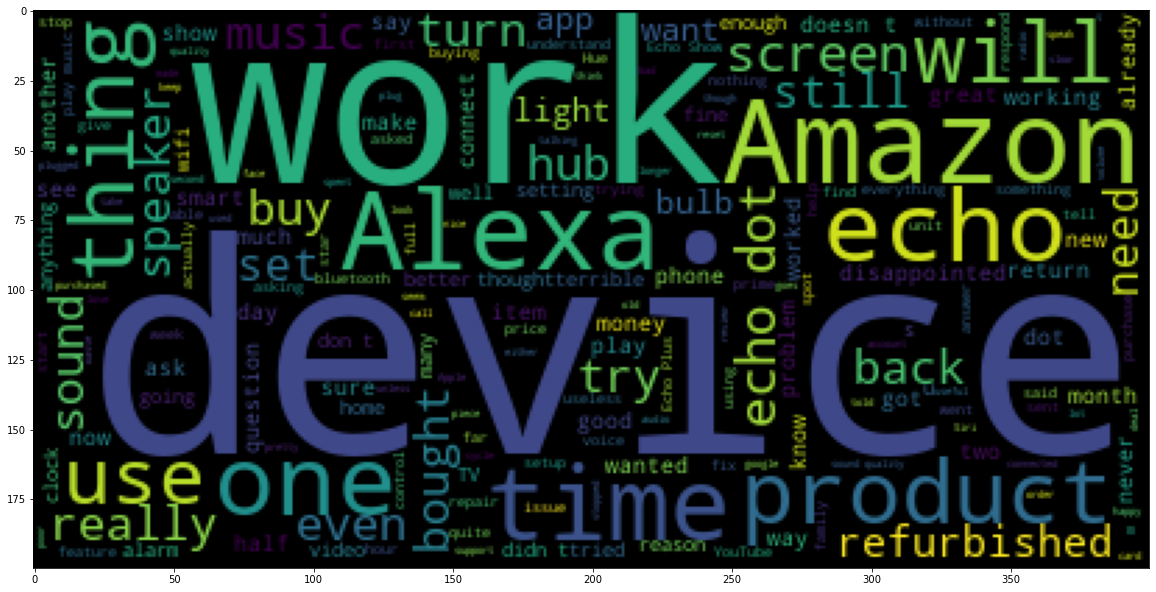

In [21]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate((neg_sentences_as_one_string)))

## Creating a pipeline to perform data cleaning

Here, we will create a pipeline to perform cleaning of the data. The pipeline performs the following tasks - 
- removes punctuations
- removes stopwords

In [39]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [40]:
#Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [43]:
#Show the original review
print(reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [44]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


### Performing CountVectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
#Defining the cleaning pipeline 
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [48]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
reviews_countvectorizer.shape

(3150, 5211)

In [51]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [53]:
X = reviews
y = reviews_df['feedback']

## Train/Test using AI/ML models

##### Performing the train-test split

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Using Naive-Bayes classifier

In [55]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

<AxesSubplot:>

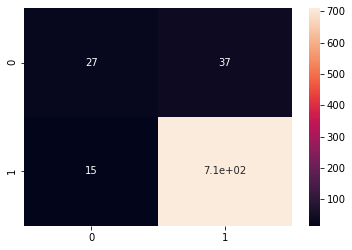

In [57]:
#predicting the Test set results
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [58]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.42      0.51        64
           1       0.95      0.98      0.96       724

    accuracy                           0.93       788
   macro avg       0.80      0.70      0.74       788
weighted avg       0.93      0.93      0.93       788



In [60]:
print(accuracy_score(y_test, y_predict))

0.934010152284264


### Using Logistic Reression

In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<AxesSubplot:>

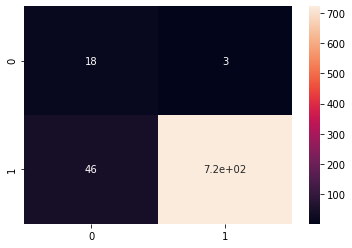

In [63]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [64]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.28      0.86      0.42        21
           1       1.00      0.94      0.97       767

    accuracy                           0.94       788
   macro avg       0.64      0.90      0.70       788
weighted avg       0.98      0.94      0.95       788



In [65]:
print(accuracy_score(y_pred, y_test))

0.9378172588832487


### Using Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<AxesSubplot:>

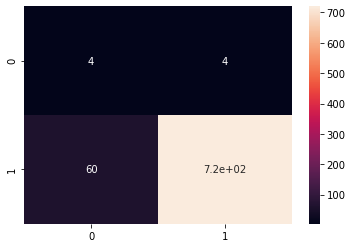

In [68]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [69]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.06      0.50      0.11         8
           1       0.99      0.92      0.96       780

    accuracy                           0.92       788
   macro avg       0.53      0.71      0.53       788
weighted avg       0.99      0.92      0.95       788



In [70]:
print(accuracy_score(y_pred, y_test))

0.9187817258883249
